In [1]:
import pycurl
import certifi
from io import BytesIO

import base64
import requests
import json
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

buffer = BytesIO()
c = pycurl.Curl()


from matplotlib import pyplot


In [2]:
key = "1bf0ce39-582e-4d31-9cae-46d3a29fc5d5"
secret = "BIwiggBeRHrZCEyFo1IL3iTzkFh2zrfXPhSydGqR"


key_secret = f'{key}:{secret}'
key_secret_bytes = key_secret.encode("ascii")
key_secret_base64 = base64.b64encode(key_secret_bytes)
auth = str(key_secret_base64)[2:-1]


addepar_url = "https://teracapital.addepar.com/api/v1/"
addepar_headers = { "Accept": "application/vnd.api+json", 'Addepar-Firm': '403', 'Authorization': 'Basic ' + auth}

In [3]:
%%capture --no-display

view_jonas= str(388310)
view_historical_returns= str(394573)

resource_area = f'portfolio/views/{view_jonas}/results'
url = addepar_url + resource_area

querystring = {"portfolio_type":"ENTITY","portfolio_id":"1877940","output_type":"JSON","start_date":"2022-02-01","end_date":"2022-08-01"}


addepar_request = requests.get(url, headers=addepar_headers, params=querystring)
addepar_results = addepar_request.json()['data']
addepar_meta = addepar_request.json()['meta']

In [4]:
x= pd.json_normalize(addepar_results["attributes"]["total"]["children"])
x= pd.json_normalize(x['children'][0])
x

,name,grouping,children,columns.billing_aum,columns.value,columns.billing_fees
0,Local,_custom_region_335655,[],1.887918e+07,3.067903e+07,35107.515655
1,Offshore,_custom_region_335655,[],2.784297e+07,3.049865e+07,51776.472979


In [5]:
%%capture --no-display


resource_area = f'portfolio/views/{view_historical_returns}/results'

url = addepar_url + resource_area

start_date='2022-02-01'
end_date='2022-08-01'
portfolio_id= '1877940' #BILBAO 


querystring = {"portfolio_type":"ENTITY","portfolio_id":portfolio_id,"output_type":"XLSX","start_date":start_date,"end_date":end_date}

addepar_request = requests.get(url, headers=addepar_headers, params=querystring)

addepar_results = addepar_request

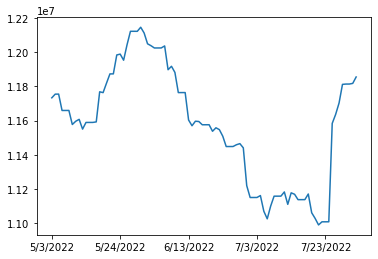

In [6]:

res_content = addepar_results.content
df = pd.read_excel(res_content,index_col="Asset Class").T

total = df.iloc[: , -1].iloc[::-1]
total.plot()
pyplot.show()

In [7]:
#TERA JURO REAL - TIME SERIES
n_column= df.columns.get_loc("TERA JURO REAL")

bilbao_juro_real= df.iloc[:,[n_column,n_column+1,n_column+2,n_column+3,n_column+4]]#.iloc[: , -1].iloc[::-1]
# bilbao_juro_real.plot()
# pyplot.show()


In [8]:
#TERA JURO REAL - TIME SERIES POR CLIENTE

bilbao_juro_real= df.iloc[:,[0,1,2,3]]
bilbao_juro_real



Asset Class,Cash & Cash Equivalent,BRL,Price,Quantity
Today,NaN,NaN,1.0,23087.561947
7/31/2022,NaN,NaN,1.0,23087.564187
7/30/2022,NaN,NaN,1.0,23087.564187
7/29/2022,NaN,NaN,1.0,23087.564187
7/28/2022,NaN,NaN,1.0,133886.214187
...,...,...,...,...
5/7/2022,NaN,NaN,1.0,36842.416309
5/6/2022,NaN,NaN,1.0,36842.416309
5/5/2022,NaN,NaN,1.0,39117.586309
5/4/2022,NaN,NaN,1.0,39117.586309


In [15]:
#ACESSING INFOS BY INVESTMENTS

#%%capture --no-display


TJR= str(15080846)

#resource_area = f'portfolio/views/{TJR}/results'
resource_area = f'entities/{TJR}'

url = addepar_url + resource_area

start_date='2022-02-01'
end_date='2022-08-01'
portfolio_id= '1877940' #BILBAO 


querystring = {"portfolio_type":"ENTITY","output_type":"JSON"} # ,"portfolio_id":portfolio_id, "start_date":start_date,"end_date":end_date}

addepar_request = requests.get(url, headers=addepar_headers, params=querystring)
addepar_results = addepar_request


In [16]:
addepar_results = addepar_request.json()
addepar_results
# res_content = addepar_results.content
# df = pd.read_excel(res_content,index_col="Asset Class").T
# df

{'data': {'id': '15080846',
  'type': 'entities',
  'attributes': {'currency_factor': 'BRL',
   'ownership_type': 'SHARE_BASED',
   'asset_class': [{'date': None, 'value': 'Renda Fixa', 'weight': 1.0}],
   'model_type': 'MUTUAL_FUND',
   '_custom_codintrag_498405': [{'date': None,
     'value': '1TERAJUR',
     'weight': 1.0}],
   '_custom_aba_carteira_914855': [{'date': None,
     'value': 'Outros_Fundos_De_Investimento',
     'weight': 1.0}],
   '_custom_region_335655': [{'date': None, 'value': 'Local', 'weight': 1.0}],
   '_custom_sub_asset_class_310515': [{'date': None,
     'value': 'Juro Real ',
     'weight': 1.0}],
   'bbgid': [{'date': None, 'value': 'BBG01609VTW2', 'weight': 1.0}],
   '_custom_price_input_type_361235': [{'date': None,
     'value': 'Outros Local',
     'weight': 1.0}],
   'original_name': 'TERA JURO REAL',
   '_custom_bbg_ticker_363502': [{'date': None,
     'value': 'TERJREL BZ Equity',
     'weight': 1.0}],
   '_custom_produtos_755687': [{'date': None,
    

In [17]:
# quem atualiza valor 
# addepar conecta ao bloomberg ?
#
# WAGNER 